In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

In [4]:
import time
import datetime
s = "2019-01-02"
time.mktime(datetime.datetime.strptime(s, "%Y-%m-%d").timetuple())
#df["datetime"] = df["date"].apply(lambda s: datetime.datetime.strptime(s, "%Y-%m-%d"))

1546383600.0

In [5]:
index_choice = 'sp500'

In [6]:
path = os.path.join("output", f"{index_choice}", "download", "*2019-01-02_2020-09-30.csv")
stocks=glob.glob(path)

stock_list= []
for file in stocks:
    head, tail = os.path.split(file)
    stock_name=tail.split("_") [0]
    stock_list.append(stock_name)
    #print(stock_name)

series= []
for stock in stock_list:
    path= os.path.join(f"output", f"{index_choice}", "download", f"{stock}_2019-01-02_2020-09-30.csv")
    df = pd.read_csv(path, encoding="UTF8")
    def rename(col):
        if col.startswith("Unnamed: "):
            return "date"
        else:
            return col
    df.columns = [rename(col) for col in df.columns]
    df["datetime"] = df["date"].apply(lambda s: datetime.datetime.strptime(s, "%Y-%m-%d"))
    series.append(df)
   


In [7]:
for stock in series:
    value = stock.loc[stock["date"]=="2020-03-02"].open.values[0]

    stock["values"] = stock["open"].apply(lambda s: s/value)
    

In [8]:
for stock in series:
    stock["values"]=(stock["open"]-stock["open"].min())/(stock["open"].max()-stock["open"].min())

In [9]:
temp_df=series[0]
temp_df.head()

,date,open,high,low,close,adjclose,volume,ticker,datetime,values
0,2019-01-02,31.459999,32.650002,31.049999,32.480000,31.963160,5229500,AAL,2019-01-02,0.809201
1,2019-01-03,31.690001,31.850000,28.809999,30.059999,29.581665,16822000,AAL,2019-01-03,0.817404
2,2019-01-04,30.440001,32.090000,30.400000,32.040001,31.530161,9369600,AAL,2019-01-04,0.772825
3,2019-01-07,31.990000,33.480000,31.240000,32.950001,32.425678,8010700,AAL,2019-01-07,0.828103
4,2019-01-08,33.360001,33.650002,32.200001,32.419998,31.904110,7107700,AAL,2019-01-08,0.876961


In [10]:
SMALL_SIZE = 6
MEDIUM_SIZE = 8
BIGGER_SIZE = 10

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

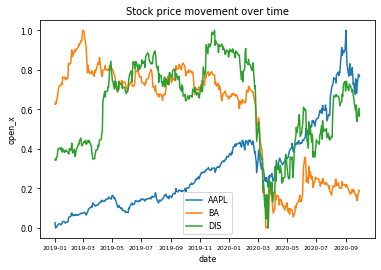

In [11]:
top3=["AAPL","BA","DIS"]
for index in range(len(series)):
    if series[index]["ticker"].values[0] in top3:
        plt.plot("datetime", "values", label = stock_list[index], data = series[index])
plt.xlabel('date')
plt.ylabel('open_x')
plt.title('Stock price movement over time')
plt.legend()
plt.show()


In [12]:
file_path = os.path.join("temp",f"{index_choice}",f"{index_choice}_final.csv")
final_df = pd.read_csv(file_path)
final_df["datetime"] = final_df["date"].apply(lambda s: datetime.datetime.strptime(s, "%Y-%m-%d"))

In [188]:
final_df.head()

,date,open_x,high,low,close,adjclose,volume_x,ticker,zip,sector,...,category,fiveYearAverageReturn,regularMarketPrice,logo_url,address2,underlyingSymbol,underlyingExchangeSymbol,headSymbol,uuid,datetime
0,2019-01-02,31.459999,32.650002,31.049999,32.480000,31.963160,5229500.0,AAL,76155,Industrials,...,NaN,NaN,12.75,https://logo.clearbit.com/aa.com,NaN,NaN,NaN,NaN,NaN,2019-01-02
1,2019-01-03,31.690001,31.850000,28.809999,30.059999,29.581665,16822000.0,AAL,76155,Industrials,...,NaN,NaN,12.75,https://logo.clearbit.com/aa.com,NaN,NaN,NaN,NaN,NaN,2019-01-03
2,2019-01-04,30.440001,32.090000,30.400000,32.040001,31.530161,9369600.0,AAL,76155,Industrials,...,NaN,NaN,12.75,https://logo.clearbit.com/aa.com,NaN,NaN,NaN,NaN,NaN,2019-01-04
3,2019-01-07,31.990000,33.480000,31.240000,32.950001,32.425678,8010700.0,AAL,76155,Industrials,...,NaN,NaN,12.75,https://logo.clearbit.com/aa.com,NaN,NaN,NaN,NaN,NaN,2019-01-07
4,2019-01-08,33.360001,33.650002,32.200001,32.419998,31.904110,7107700.0,AAL,76155,Industrials,...,NaN,NaN,12.75,https://logo.clearbit.com/aa.com,NaN,NaN,NaN,NaN,NaN,2019-01-08


In [13]:
sector_list = pd.Series(data=final_df["sector"]).unique()
print(sector_list)

['Industrials' 'Technology' 'Consumer Cyclical' 'Healthcare'
 'Consumer Defensive' 'Utilities' 'Financial Services' 'Real Estate'
 'Basic Materials' 'Energy' 'Communication Services' nan]


In [14]:

#for sector in sector_list:
   # f"df_{sector}" = final_df.loc[final_df["sector"][i] == sector]

sector_dict={}
for sector in sector_list:   
    sector_dict[sector] = final_df.loc[final_df["sector"] == sector]
    

technology_df = sector_dict["Technology"]

#df_technology = f"{index_choice}".loc[dow_df["sector"] == "Technology"]

#df_healthcare = dow_df.loc[dow_df["sector"] == "Healthcare"]

#df_industrials = dow_df.loc[dow_df["sector"] == "Industrials"]

In [15]:
df_group = final_df.groupby(by="sector")


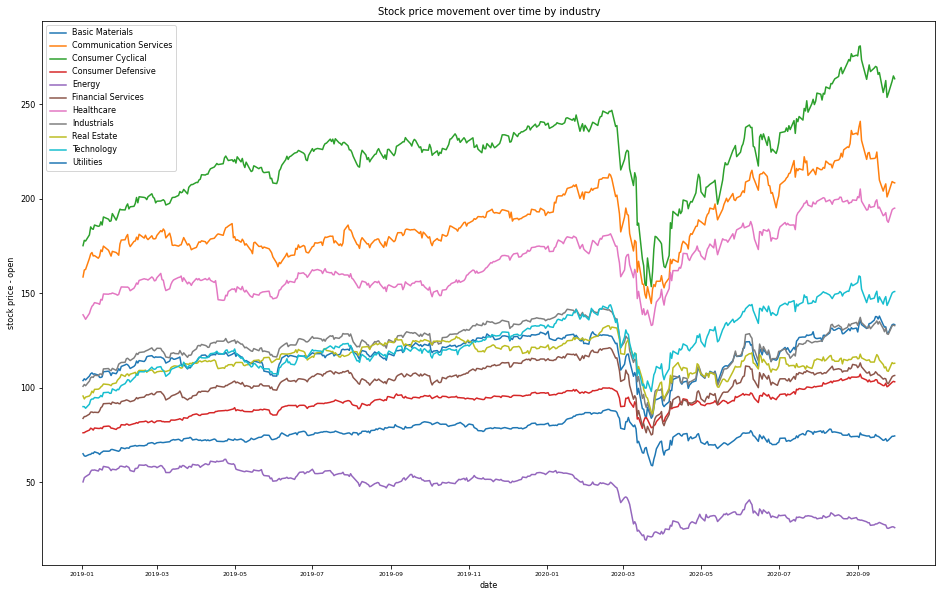

In [18]:
fig = plt.figure(figsize=(16,10))
for sector, df in df_group:
    df_group_date = df.groupby(by="datetime").mean("open_x").reset_index()
    plt.plot("datetime", "open_x",label =sector, data = df_group_date)
plt.xlabel('date')
plt.ylabel('stock price - open')
plt.title('Stock price movement over time by industry')
plt.legend()
plt.show()


Basic Materials


,date,open_x,high,low,close,adjclose,volume_x,ticker,zip,sector,...,category,fiveYearAverageReturn,regularMarketPrice,logo_url,address2,underlyingSymbol,underlyingExchangeSymbol,headSymbol,uuid,datetime
9702,2019-01-02,75.800003,79.029999,75.129997,78.110001,75.469269,1052300.0,ALB,28209,Basic Materials,...,NaN,NaN,93.49,https://logo.clearbit.com/albemarle.com,Suite 900,NaN,NaN,NaN,NaN,2019-01-02
9703,2019-01-03,76.849998,76.879997,72.580002,72.690002,70.232513,1968100.0,ALB,28209,Basic Materials,...,NaN,NaN,93.49,https://logo.clearbit.com/albemarle.com,Suite 900,NaN,NaN,NaN,NaN,2019-01-03
9704,2019-01-04,74.570000,77.279999,74.370003,76.239998,73.662483,2089500.0,ALB,28209,Basic Materials,...,NaN,NaN,93.49,https://logo.clearbit.com/albemarle.com,Suite 900,NaN,NaN,NaN,NaN,2019-01-04
9705,2019-01-07,76.290001,77.139999,75.349998,76.580002,73.991005,1413300.0,ALB,28209,Basic Materials,...,NaN,NaN,93.49,https://logo.clearbit.com/albemarle.com,Suite 900,NaN,NaN,NaN,NaN,2019-01-07
9706,2019-01-08,77.279999,77.709999,76.599998,77.330002,74.715652,1622800.0,ALB,28209,Basic Materials,...,NaN,NaN,93.49,https://logo.clearbit.com/albemarle.com,Suite 900,NaN,NaN,NaN,NaN,2019-01-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204105,2020-09-24,126.070000,130.470001,125.599998,128.539993,128.539993,683100.0,VMC,35242,Basic Materials,...,NaN,NaN,146.92,https://logo.clearbit.com/vulcanmaterials.com,NaN,NaN,NaN,NaN,fc3a76c0-c7e2-3c13-b72f-425e37549ca1,2020-09-24
204106,2020-09-25,126.800003,131.220001,126.800003,130.479996,130.479996,829600.0,VMC,35242,Basic Materials,...,NaN,NaN,146.92,https://logo.clearbit.com/vulcanmaterials.com,NaN,NaN,NaN,NaN,fc3a76c0-c7e2-3c13-b72f-425e37549ca1,2020-09-25
204107,2020-09-28,131.740005,135.710007,131.740005,133.720001,133.720001,708500.0,VMC,35242,Basic Materials,...,NaN,NaN,146.92,https://logo.clearbit.com/vulcanmaterials.com,NaN,NaN,NaN,NaN,fc3a76c0-c7e2-3c13-b72f-425e37549ca1,2020-09-28
204108,2020-09-29,132.850006,133.600006,131.179993,132.699997,132.699997,544200.0,VMC,35242,Basic Materials,...,NaN,NaN,146.92,https://logo.clearbit.com/vulcanmaterials.com,NaN,NaN,NaN,NaN,fc3a76c0-c7e2-3c13-b72f-425e37549ca1,2020-09-29



Communication Services


,date,open_x,high,low,close,adjclose,volume_x,ticker,zip,sector,...,category,fiveYearAverageReturn,regularMarketPrice,logo_url,address2,underlyingSymbol,underlyingExchangeSymbol,headSymbol,uuid,datetime
20727,2019-01-02,45.250000,47.509998,45.139999,47.029999,46.350380,7245700.0,ATVI,90405,Communication Services,...,NaN,NaN,80.50,https://logo.clearbit.com/activisionblizzard.com,NaN,NaN,NaN,NaN,NaN,2019-01-02
20728,2019-01-03,46.439999,46.650002,45.000000,45.360001,44.704514,8266400.0,ATVI,90405,Communication Services,...,NaN,NaN,80.50,https://logo.clearbit.com/activisionblizzard.com,NaN,NaN,NaN,NaN,NaN,2019-01-03
20729,2019-01-04,46.000000,47.549999,45.130001,47.169998,46.488358,9081900.0,ATVI,90405,Communication Services,...,NaN,NaN,80.50,https://logo.clearbit.com/activisionblizzard.com,NaN,NaN,NaN,NaN,NaN,2019-01-04
20730,2019-01-07,47.240002,49.080002,47.090000,48.500000,47.799141,9112100.0,ATVI,90405,Communication Services,...,NaN,NaN,80.50,https://logo.clearbit.com/activisionblizzard.com,NaN,NaN,NaN,NaN,NaN,2019-01-07
20731,2019-01-08,49.070000,51.110001,49.000000,49.970001,49.247898,12428700.0,ATVI,90405,Communication Services,...,NaN,NaN,80.50,https://logo.clearbit.com/activisionblizzard.com,NaN,NaN,NaN,NaN,NaN,2019-01-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206751,2020-09-24,59.000000,59.560001,58.650002,59.189999,58.566425,10875300.0,VZ,10036,Communication Services,...,NaN,NaN,57.54,https://logo.clearbit.com/verizon.com,NaN,NaN,NaN,NaN,a708480c-0400-3ea0-b2d3-ca752db5c3b1,2020-09-24
206752,2020-09-25,58.849998,59.450001,58.810001,59.389999,58.764320,10676300.0,VZ,10036,Communication Services,...,NaN,NaN,57.54,https://logo.clearbit.com/verizon.com,NaN,NaN,NaN,NaN,a708480c-0400-3ea0-b2d3-ca752db5c3b1,2020-09-25
206753,2020-09-28,59.560001,59.799999,59.180000,59.360001,58.734634,11910500.0,VZ,10036,Communication Services,...,NaN,NaN,57.54,https://logo.clearbit.com/verizon.com,NaN,NaN,NaN,NaN,a708480c-0400-3ea0-b2d3-ca752db5c3b1,2020-09-28
206754,2020-09-29,59.279999,59.490002,59.099998,59.240002,58.615902,10005900.0,VZ,10036,Communication Services,...,NaN,NaN,57.54,https://logo.clearbit.com/verizon.com,NaN,NaN,NaN,NaN,a708480c-0400-3ea0-b2d3-ca752db5c3b1,2020-09-29



Consumer Cyclical


,date,open_x,high,low,close,adjclose,volume_x,ticker,zip,sector,...,category,fiveYearAverageReturn,regularMarketPrice,logo_url,address2,underlyingSymbol,underlyingExchangeSymbol,headSymbol,uuid,datetime
882,2019-01-02,156.160004,159.919998,153.820007,157.919998,156.437698,1291000.0,AAP,27604,Consumer Cyclical,...,NaN,NaN,154.68,https://logo.clearbit.com/advanceautoparts.com,NaN,NaN,NaN,NaN,NaN,2019-01-02
883,2019-01-03,158.229996,164.070007,157.740005,162.850006,161.321426,1514700.0,AAP,27604,Consumer Cyclical,...,NaN,NaN,154.68,https://logo.clearbit.com/advanceautoparts.com,NaN,NaN,NaN,NaN,NaN,2019-01-03
884,2019-01-04,164.169998,164.500000,158.479996,158.809998,157.319321,1423000.0,AAP,27604,Consumer Cyclical,...,NaN,NaN,154.68,https://logo.clearbit.com/advanceautoparts.com,NaN,NaN,NaN,NaN,NaN,2019-01-04
885,2019-01-07,161.679993,163.570007,156.830002,161.139999,159.627472,2088300.0,AAP,27604,Consumer Cyclical,...,NaN,NaN,154.68,https://logo.clearbit.com/advanceautoparts.com,NaN,NaN,NaN,NaN,NaN,2019-01-07
886,2019-01-08,162.009995,162.949997,157.179993,160.020004,158.518005,1604700.0,AAP,27604,Consumer Cyclical,...,NaN,NaN,154.68,https://logo.clearbit.com/advanceautoparts.com,NaN,NaN,NaN,NaN,NaN,2019-01-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218217,2020-09-24,89.680000,91.480003,89.120003,91.370003,91.370003,1650700.0,YUM,40213,Consumer Cyclical,...,NaN,NaN,97.87,https://logo.clearbit.com/yum.com,NaN,NaN,NaN,NaN,b8fcb647-8cfb-3592-a2bf-1d9e21aa2452,2020-09-24
218218,2020-09-25,91.040001,91.739998,89.730003,91.379997,91.379997,1154800.0,YUM,40213,Consumer Cyclical,...,NaN,NaN,97.87,https://logo.clearbit.com/yum.com,NaN,NaN,NaN,NaN,b8fcb647-8cfb-3592-a2bf-1d9e21aa2452,2020-09-25
218219,2020-09-28,91.879997,92.449997,91.389999,91.879997,91.879997,1694600.0,YUM,40213,Consumer Cyclical,...,NaN,NaN,97.87,https://logo.clearbit.com/yum.com,NaN,NaN,NaN,NaN,b8fcb647-8cfb-3592-a2bf-1d9e21aa2452,2020-09-28
218220,2020-09-29,91.580002,91.879997,90.239998,90.709999,90.709999,1612600.0,YUM,40213,Consumer Cyclical,...,NaN,NaN,97.87,https://logo.clearbit.com/yum.com,NaN,NaN,NaN,NaN,b8fcb647-8cfb-3592-a2bf-1d9e21aa2452,2020-09-29



Consumer Defensive


,date,open_x,high,low,close,adjclose,volume_x,ticker,zip,sector,...,category,fiveYearAverageReturn,regularMarketPrice,logo_url,address2,underlyingSymbol,underlyingExchangeSymbol,headSymbol,uuid,datetime
4410,2019-01-02,40.570000,41.150002,40.529999,40.950001,38.542694,2497000.0,ADM,60601,Consumer Defensive,...,NaN,NaN,50.83,https://logo.clearbit.com/adm.com,Suite 4600,NaN,NaN,NaN,NaN,2019-01-02
4411,2019-01-03,40.790001,41.340000,40.400002,40.770000,38.373280,3273000.0,ADM,60601,Consumer Defensive,...,NaN,NaN,50.83,https://logo.clearbit.com/adm.com,Suite 4600,NaN,NaN,NaN,NaN,2019-01-03
4412,2019-01-04,41.169998,41.810001,41.090000,41.709999,39.258022,3117100.0,ADM,60601,Consumer Defensive,...,NaN,NaN,50.83,https://logo.clearbit.com/adm.com,Suite 4600,NaN,NaN,NaN,NaN,2019-01-04
4413,2019-01-07,41.540001,42.439999,41.470001,41.919998,39.455673,3970100.0,ADM,60601,Consumer Defensive,...,NaN,NaN,50.83,https://logo.clearbit.com/adm.com,Suite 4600,NaN,NaN,NaN,NaN,2019-01-07
4414,2019-01-08,42.230000,42.740002,42.029999,42.700001,40.189819,5096800.0,ADM,60601,Consumer Defensive,...,NaN,NaN,50.83,https://logo.clearbit.com/adm.com,Suite 4600,NaN,NaN,NaN,NaN,2019-01-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212043,2020-09-24,135.729996,137.789993,135.070007,136.699997,136.699997,9817700.0,WMT,72716,Consumer Defensive,...,NaN,NaN,144.11,https://logo.clearbit.com/stock.walmart.com,NaN,NaN,NaN,NaN,902d429a-38af-3903-a1d7-3374c3560928,2020-09-24
212044,2020-09-25,136.520004,137.539993,135.960007,137.270004,137.270004,7539600.0,WMT,72716,Consumer Defensive,...,NaN,NaN,144.11,https://logo.clearbit.com/stock.walmart.com,NaN,NaN,NaN,NaN,902d429a-38af-3903-a1d7-3374c3560928,2020-09-25
212045,2020-09-28,137.160004,138.050003,136.720001,137.250000,137.250000,7065700.0,WMT,72716,Consumer Defensive,...,NaN,NaN,144.11,https://logo.clearbit.com/stock.walmart.com,NaN,NaN,NaN,NaN,902d429a-38af-3903-a1d7-3374c3560928,2020-09-28
212046,2020-09-29,137.250000,138.139999,136.389999,137.139999,137.139999,9234300.0,WMT,72716,Consumer Defensive,...,NaN,NaN,144.11,https://logo.clearbit.com/stock.walmart.com,NaN,NaN,NaN,NaN,902d429a-38af-3903-a1d7-3374c3560928,2020-09-29



Energy


,date,open_x,high,low,close,adjclose,volume_x,ticker,zip,sector,...,category,fiveYearAverageReturn,regularMarketPrice,logo_url,address2,underlyingSymbol,underlyingExchangeSymbol,headSymbol,uuid,datetime
18081,2019-01-02,25.610001,27.580000,25.590000,27.110001,25.744434,4629400.0,APA,77056,Energy,...,NaN,NaN,9.22,https://logo.clearbit.com/apachecorp.com,Suite 100 2000 Post Oak Boulevard,NaN,NaN,NaN,NaN,2019-01-02
18082,2019-01-03,27.120001,27.799999,26.610001,27.180000,25.810911,5351400.0,APA,77056,Energy,...,NaN,NaN,9.22,https://logo.clearbit.com/apachecorp.com,Suite 100 2000 Post Oak Boulevard,NaN,NaN,NaN,NaN,2019-01-03
18083,2019-01-04,27.780001,28.430000,27.469999,28.320000,26.893486,4215700.0,APA,77056,Energy,...,NaN,NaN,9.22,https://logo.clearbit.com/apachecorp.com,Suite 100 2000 Post Oak Boulevard,NaN,NaN,NaN,NaN,2019-01-04
18084,2019-01-07,28.370001,29.150000,27.920000,28.930000,27.472759,3924400.0,APA,77056,Energy,...,NaN,NaN,9.22,https://logo.clearbit.com/apachecorp.com,Suite 100 2000 Post Oak Boulevard,NaN,NaN,NaN,NaN,2019-01-07
18085,2019-01-08,29.240000,29.600000,28.750000,29.360001,27.881102,4131000.0,APA,77056,Energy,...,NaN,NaN,9.22,https://logo.clearbit.com/apachecorp.com,Suite 100 2000 Post Oak Boulevard,NaN,NaN,NaN,NaN,2019-01-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216453,2020-09-24,34.400002,34.820000,33.759998,34.320000,34.320000,26796000.0,XOM,75039-2298,Energy,...,NaN,NaN,33.66,https://logo.clearbit.com/corporate.exxonmobil...,NaN,NaN,NaN,NaN,623c29c3-4307-34c2-840f-d89284dd4857,2020-09-24
216454,2020-09-25,34.000000,34.939999,33.880001,34.639999,34.639999,23486000.0,XOM,75039-2298,Energy,...,NaN,NaN,33.66,https://logo.clearbit.com/corporate.exxonmobil...,NaN,NaN,NaN,NaN,623c29c3-4307-34c2-840f-d89284dd4857,2020-09-25
216455,2020-09-28,35.139999,35.900002,35.099998,35.310001,35.310001,23396500.0,XOM,75039-2298,Energy,...,NaN,NaN,33.66,https://logo.clearbit.com/corporate.exxonmobil...,NaN,NaN,NaN,NaN,623c29c3-4307-34c2-840f-d89284dd4857,2020-09-28
216456,2020-09-29,35.000000,35.110001,33.990002,34.279999,34.279999,20770500.0,XOM,75039-2298,Energy,...,NaN,NaN,33.66,https://logo.clearbit.com/corporate.exxonmobil...,NaN,NaN,NaN,NaN,623c29c3-4307-34c2-840f-d89284dd4857,2020-09-29



Financial Services


,date,open_x,high,low,close,adjclose,volume_x,ticker,zip,sector,...,category,fiveYearAverageReturn,regularMarketPrice,logo_url,address2,underlyingSymbol,underlyingExchangeSymbol,headSymbol,uuid,datetime
7056,2019-01-02,44.590000,45.580002,44.529999,45.520000,43.660503,4022100.0,AFL,31999,Financial Services,...,NaN,NaN,36.93,https://logo.clearbit.com/aflac.com,NaN,NaN,NaN,NaN,NaN,2019-01-02
7057,2019-01-03,45.369999,45.580002,44.279999,44.369999,42.557484,4239700.0,AFL,31999,Financial Services,...,NaN,NaN,36.93,https://logo.clearbit.com/aflac.com,NaN,NaN,NaN,NaN,NaN,2019-01-03
7058,2019-01-04,45.020000,45.250000,44.689999,44.919998,43.085018,4761500.0,AFL,31999,Financial Services,...,NaN,NaN,36.93,https://logo.clearbit.com/aflac.com,NaN,NaN,NaN,NaN,NaN,2019-01-04
7059,2019-01-07,44.889999,45.619999,44.689999,45.160000,43.315212,3414400.0,AFL,31999,Financial Services,...,NaN,NaN,36.93,https://logo.clearbit.com/aflac.com,NaN,NaN,NaN,NaN,NaN,2019-01-07
7060,2019-01-08,45.509998,45.669998,44.830002,45.299999,43.449493,3017000.0,AFL,31999,Financial Services,...,NaN,NaN,36.93,https://logo.clearbit.com/aflac.com,NaN,NaN,NaN,NaN,NaN,2019-01-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219540,2020-09-24,28.270000,28.879999,27.680000,28.219999,28.219999,1255400.0,ZION,84133-1109,Financial Services,...,NaN,NaN,31.58,https://logo.clearbit.com/zionsbancorporation.com,NaN,NaN,NaN,NaN,687d0c8c-3762-3a32-b59e-6ee6e99f5d45,2020-09-24
219541,2020-09-25,27.820000,28.540001,27.549999,28.450001,28.450001,1546600.0,ZION,84133-1109,Financial Services,...,NaN,NaN,31.58,https://logo.clearbit.com/zionsbancorporation.com,NaN,NaN,NaN,NaN,687d0c8c-3762-3a32-b59e-6ee6e99f5d45,2020-09-25
219542,2020-09-28,28.990000,29.639999,28.830000,29.379999,29.379999,1478700.0,ZION,84133-1109,Financial Services,...,NaN,NaN,31.58,https://logo.clearbit.com/zionsbancorporation.com,NaN,NaN,NaN,NaN,687d0c8c-3762-3a32-b59e-6ee6e99f5d45,2020-09-28
219543,2020-09-29,29.219999,29.559999,28.540001,28.969999,28.969999,1437200.0,ZION,84133-1109,Financial Services,...,NaN,NaN,31.58,https://logo.clearbit.com/zionsbancorporation.com,NaN,NaN,NaN,NaN,687d0c8c-3762-3a32-b59e-6ee6e99f5d45,2020-09-29



Healthcare


,date,open_x,high,low,close,adjclose,volume_x,ticker,zip,sector,...,category,fiveYearAverageReturn,regularMarketPrice,logo_url,address2,underlyingSymbol,underlyingExchangeSymbol,headSymbol,uuid,datetime
1323,2019-01-02,91.239998,91.260002,88.419998,89.230003,78.864014,6908400.0,ABBV,60064,Healthcare,...,NaN,NaN,84.19,https://logo.clearbit.com/abbvie.com,NaN,NaN,NaN,NaN,NaN,2019-01-02
1324,2019-01-03,88.639999,88.800003,86.080002,86.290001,76.265549,7653200.0,ABBV,60064,Healthcare,...,NaN,NaN,84.19,https://logo.clearbit.com/abbvie.com,NaN,NaN,NaN,NaN,NaN,2019-01-03
1325,2019-01-04,87.750000,89.139999,86.269997,89.070000,78.722588,8910600.0,ABBV,60064,Healthcare,...,NaN,NaN,84.19,https://logo.clearbit.com/abbvie.com,NaN,NaN,NaN,NaN,NaN,2019-01-04
1326,2019-01-07,90.070000,90.760002,89.199997,90.370003,79.871574,7281500.0,ABBV,60064,Healthcare,...,NaN,NaN,84.19,https://logo.clearbit.com/abbvie.com,NaN,NaN,NaN,NaN,NaN,2019-01-07
1327,2019-01-08,91.199997,92.300003,90.400002,90.790001,80.242790,7478300.0,ABBV,60064,Healthcare,...,NaN,NaN,84.19,https://logo.clearbit.com/abbvie.com,NaN,NaN,NaN,NaN,NaN,2019-01-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219981,2020-09-24,158.839996,159.509995,156.529999,157.979996,157.782501,1415600.0,ZTS,07054,Healthcare,...,NaN,NaN,160.28,https://logo.clearbit.com/zoetis.com,NaN,NaN,NaN,NaN,e8724ae7-5c8b-3a4a-927d-2a11631a1cf4,2020-09-24
219982,2020-09-25,157.429993,161.460007,157.250000,160.839996,160.638931,1195900.0,ZTS,07054,Healthcare,...,NaN,NaN,160.28,https://logo.clearbit.com/zoetis.com,NaN,NaN,NaN,NaN,e8724ae7-5c8b-3a4a-927d-2a11631a1cf4,2020-09-25
219983,2020-09-28,162.160004,164.339996,161.160004,161.320007,161.118347,2293800.0,ZTS,07054,Healthcare,...,NaN,NaN,160.28,https://logo.clearbit.com/zoetis.com,NaN,NaN,NaN,NaN,e8724ae7-5c8b-3a4a-927d-2a11631a1cf4,2020-09-28
219984,2020-09-29,161.619995,163.410004,161.440002,162.479996,162.276886,1046300.0,ZTS,07054,Healthcare,...,NaN,NaN,160.28,https://logo.clearbit.com/zoetis.com,NaN,NaN,NaN,NaN,e8724ae7-5c8b-3a4a-927d-2a11631a1cf4,2020-09-29



Industrials


,date,open_x,high,low,close,adjclose,volume_x,ticker,zip,sector,...,category,fiveYearAverageReturn,regularMarketPrice,logo_url,address2,underlyingSymbol,underlyingExchangeSymbol,headSymbol,uuid,datetime
0,2019-01-02,31.459999,32.650002,31.049999,32.480000,31.963160,5229500.0,AAL,76155,Industrials,...,NaN,NaN,12.75,https://logo.clearbit.com/aa.com,NaN,NaN,NaN,NaN,NaN,2019-01-02
1,2019-01-03,31.690001,31.850000,28.809999,30.059999,29.581665,16822000.0,AAL,76155,Industrials,...,NaN,NaN,12.75,https://logo.clearbit.com/aa.com,NaN,NaN,NaN,NaN,NaN,2019-01-03
2,2019-01-04,30.440001,32.090000,30.400000,32.040001,31.530161,9369600.0,AAL,76155,Industrials,...,NaN,NaN,12.75,https://logo.clearbit.com/aa.com,NaN,NaN,NaN,NaN,NaN,2019-01-04
3,2019-01-07,31.990000,33.480000,31.240000,32.950001,32.425678,8010700.0,AAL,76155,Industrials,...,NaN,NaN,12.75,https://logo.clearbit.com/aa.com,NaN,NaN,NaN,NaN,NaN,2019-01-07
4,2019-01-08,33.360001,33.650002,32.200001,32.419998,31.904110,7107700.0,AAL,76155,Industrials,...,NaN,NaN,12.75,https://logo.clearbit.com/aa.com,NaN,NaN,NaN,NaN,NaN,2019-01-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217776,2020-09-24,82.260002,83.220001,81.430000,82.199997,82.199997,1038800.0,XYL,10573,Industrials,...,NaN,NaN,91.20,https://logo.clearbit.com/xylem.com,NaN,NaN,NaN,NaN,0b3e315c-d662-3b77-8ee7-b43a259aa3cf,2020-09-24
217777,2020-09-25,81.690002,83.279999,81.150002,83.059998,83.059998,850700.0,XYL,10573,Industrials,...,NaN,NaN,91.20,https://logo.clearbit.com/xylem.com,NaN,NaN,NaN,NaN,0b3e315c-d662-3b77-8ee7-b43a259aa3cf,2020-09-25
217778,2020-09-28,84.209999,84.970001,83.660004,83.860001,83.860001,806800.0,XYL,10573,Industrials,...,NaN,NaN,91.20,https://logo.clearbit.com/xylem.com,NaN,NaN,NaN,NaN,0b3e315c-d662-3b77-8ee7-b43a259aa3cf,2020-09-28
217779,2020-09-29,84.389999,84.389999,83.300003,83.769997,83.769997,885600.0,XYL,10573,Industrials,...,NaN,NaN,91.20,https://logo.clearbit.com/xylem.com,NaN,NaN,NaN,NaN,0b3e315c-d662-3b77-8ee7-b43a259aa3cf,2020-09-29



Real Estate


,date,open_x,high,low,close,adjclose,volume_x,ticker,zip,sector,...,category,fiveYearAverageReturn,regularMarketPrice,logo_url,address2,underlyingSymbol,underlyingExchangeSymbol,headSymbol,uuid,datetime
7938,2019-01-02,43.470001,43.470001,42.060001,42.349998,38.434978,1388700.0,AIV,80237,Real Estate,...,NaN,NaN,33.42,https://logo.clearbit.com/aimco.com,Suite 1700,NaN,NaN,NaN,NaN,2019-01-02
7939,2019-01-03,42.250000,43.189999,42.250000,42.720001,38.770779,1526800.0,AIV,80237,Real Estate,...,NaN,NaN,33.42,https://logo.clearbit.com/aimco.com,Suite 1700,NaN,NaN,NaN,NaN,2019-01-03
7940,2019-01-04,42.860001,43.200001,42.669998,42.869999,38.906906,1742500.0,AIV,80237,Real Estate,...,NaN,NaN,33.42,https://logo.clearbit.com/aimco.com,Suite 1700,NaN,NaN,NaN,NaN,2019-01-04
7941,2019-01-07,43.029999,43.439999,42.810001,42.900002,38.934139,1175600.0,AIV,80237,Real Estate,...,NaN,NaN,33.42,https://logo.clearbit.com/aimco.com,Suite 1700,NaN,NaN,NaN,NaN,2019-01-07
7942,2019-01-08,42.930000,44.150002,42.930000,44.080002,40.005058,1152400.0,AIV,80237,Real Estate,...,NaN,NaN,33.42,https://logo.clearbit.com/aimco.com,Suite 1700,NaN,NaN,NaN,NaN,2019-01-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215130,2020-09-24,26.850000,27.440001,26.510000,26.980000,26.980000,3549000.0,WY,98104,Real Estate,...,NaN,NaN,29.68,https://logo.clearbit.com/weyerhaeuser.com,NaN,NaN,NaN,NaN,05184b2f-ec44-3de3-abe5-d5f386d7e1eb,2020-09-24
215131,2020-09-25,26.709999,27.370001,26.549999,27.280001,27.280001,2876400.0,WY,98104,Real Estate,...,NaN,NaN,29.68,https://logo.clearbit.com/weyerhaeuser.com,NaN,NaN,NaN,NaN,05184b2f-ec44-3de3-abe5-d5f386d7e1eb,2020-09-25
215132,2020-09-28,28.010000,28.410000,27.610001,28.309999,28.309999,3425400.0,WY,98104,Real Estate,...,NaN,NaN,29.68,https://logo.clearbit.com/weyerhaeuser.com,NaN,NaN,NaN,NaN,05184b2f-ec44-3de3-abe5-d5f386d7e1eb,2020-09-28
215133,2020-09-29,28.410000,28.610001,27.850000,28.049999,28.049999,2999600.0,WY,98104,Real Estate,...,NaN,NaN,29.68,https://logo.clearbit.com/weyerhaeuser.com,NaN,NaN,NaN,NaN,05184b2f-ec44-3de3-abe5-d5f386d7e1eb,2020-09-29



Technology


,date,open_x,high,low,close,adjclose,volume_x,ticker,zip,sector,...,category,fiveYearAverageReturn,regularMarketPrice,logo_url,address2,underlyingSymbol,underlyingExchangeSymbol,headSymbol,uuid,datetime
441,2019-01-02,38.722500,39.712502,38.557499,39.480000,38.629097,148158800.0,AAPL,95014,Technology,...,NaN,NaN,116.20,https://logo.clearbit.com/apple.com,NaN,NaN,NaN,NaN,NaN,2019-01-02
442,2019-01-03,35.994999,36.430000,35.500000,35.547501,34.781353,365248800.0,AAPL,95014,Technology,...,NaN,NaN,116.20,https://logo.clearbit.com/apple.com,NaN,NaN,NaN,NaN,NaN,2019-01-03
443,2019-01-04,36.132500,37.137501,35.950001,37.064999,36.266144,234428400.0,AAPL,95014,Technology,...,NaN,NaN,116.20,https://logo.clearbit.com/apple.com,NaN,NaN,NaN,NaN,NaN,2019-01-04
444,2019-01-07,37.174999,37.207500,36.474998,36.982498,36.185429,219111200.0,AAPL,95014,Technology,...,NaN,NaN,116.20,https://logo.clearbit.com/apple.com,NaN,NaN,NaN,NaN,NaN,2019-01-07
445,2019-01-08,37.389999,37.955002,37.130001,37.687500,36.875229,164101200.0,AAPL,95014,Technology,...,NaN,NaN,116.20,https://logo.clearbit.com/apple.com,NaN,NaN,NaN,NaN,NaN,2019-01-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219099,2020-09-24,247.309998,252.720001,247.309998,250.669998,250.669998,215700.0,ZBRA,60069,Technology,...,NaN,NaN,293.24,https://logo.clearbit.com/zebra.com,NaN,NaN,NaN,NaN,53165cfc-fc73-3828-9c77-43899ee16f76,2020-09-24
219100,2020-09-25,251.910004,258.700012,250.050003,257.459991,257.459991,250600.0,ZBRA,60069,Technology,...,NaN,NaN,293.24,https://logo.clearbit.com/zebra.com,NaN,NaN,NaN,NaN,53165cfc-fc73-3828-9c77-43899ee16f76,2020-09-25
219101,2020-09-28,261.059998,264.019989,259.049988,260.559998,260.559998,272700.0,ZBRA,60069,Technology,...,NaN,NaN,293.24,https://logo.clearbit.com/zebra.com,NaN,NaN,NaN,NaN,53165cfc-fc73-3828-9c77-43899ee16f76,2020-09-28
219102,2020-09-29,262.209991,263.089996,257.630005,258.920013,258.920013,190500.0,ZBRA,60069,Technology,...,NaN,NaN,293.24,https://logo.clearbit.com/zebra.com,NaN,NaN,NaN,NaN,53165cfc-fc73-3828-9c77-43899ee16f76,2020-09-29



Utilities


,date,open_x,high,low,close,adjclose,volume_x,ticker,zip,sector,...,category,fiveYearAverageReturn,regularMarketPrice,logo_url,address2,underlyingSymbol,underlyingExchangeSymbol,headSymbol,uuid,datetime
5733,2019-01-02,65.070000,65.120003,63.130001,63.529999,60.758095,1325200.0,AEE,63103,Utilities,...,NaN,NaN,82.19,https://logo.clearbit.com/ameren.com,NaN,NaN,NaN,NaN,NaN,2019-01-02
5734,2019-01-03,63.490002,64.209999,63.330002,63.689999,60.911106,1362900.0,AEE,63103,Utilities,...,NaN,NaN,82.19,https://logo.clearbit.com/ameren.com,NaN,NaN,NaN,NaN,NaN,2019-01-03
5735,2019-01-04,63.450001,64.790001,63.279999,64.589996,61.771839,1691100.0,AEE,63103,Utilities,...,NaN,NaN,82.19,https://logo.clearbit.com/ameren.com,NaN,NaN,NaN,NaN,NaN,2019-01-04
5736,2019-01-07,64.230003,64.699997,63.680000,63.849998,61.064129,2235500.0,AEE,63103,Utilities,...,NaN,NaN,82.19,https://logo.clearbit.com/ameren.com,NaN,NaN,NaN,NaN,NaN,2019-01-07
5737,2019-01-08,64.019997,64.940002,63.689999,64.860001,62.030060,1268800.0,AEE,63103,Utilities,...,NaN,NaN,82.19,https://logo.clearbit.com/ameren.com,NaN,NaN,NaN,NaN,NaN,2019-01-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215571,2020-09-24,66.099998,67.470001,65.809998,67.070000,67.070000,2035100.0,XEL,55401,Utilities,...,NaN,NaN,72.04,https://logo.clearbit.com/xcelenergy.com,NaN,NaN,NaN,NaN,d977fcfc-aff2-3286-97db-8771b2b3be45,2020-09-24
215572,2020-09-25,66.699997,68.599998,66.510002,68.500000,68.500000,2217000.0,XEL,55401,Utilities,...,NaN,NaN,72.04,https://logo.clearbit.com/xcelenergy.com,NaN,NaN,NaN,NaN,d977fcfc-aff2-3286-97db-8771b2b3be45,2020-09-25
215573,2020-09-28,68.860001,69.260002,68.370003,68.849998,68.849998,2062300.0,XEL,55401,Utilities,...,NaN,NaN,72.04,https://logo.clearbit.com/xcelenergy.com,NaN,NaN,NaN,NaN,d977fcfc-aff2-3286-97db-8771b2b3be45,2020-09-28
215574,2020-09-29,69.120003,69.519997,68.400002,68.650002,68.650002,2066200.0,XEL,55401,Utilities,...,NaN,NaN,72.04,https://logo.clearbit.com/xcelenergy.com,NaN,NaN,NaN,NaN,d977fcfc-aff2-3286-97db-8771b2b3be45,2020-09-29


In [217]:
final_df.head()

,date,open_x,high,low,close,adjclose,volume_x,ticker,zip,sector,...,category,fiveYearAverageReturn,regularMarketPrice,logo_url,address2,underlyingSymbol,underlyingExchangeSymbol,headSymbol,uuid,datetime
0,2019-01-02,31.459999,32.650002,31.049999,32.480000,31.963160,5229500.0,AAL,76155,Industrials,...,NaN,NaN,12.75,https://logo.clearbit.com/aa.com,NaN,NaN,NaN,NaN,NaN,2019-01-02
1,2019-01-03,31.690001,31.850000,28.809999,30.059999,29.581665,16822000.0,AAL,76155,Industrials,...,NaN,NaN,12.75,https://logo.clearbit.com/aa.com,NaN,NaN,NaN,NaN,NaN,2019-01-03
2,2019-01-04,30.440001,32.090000,30.400000,32.040001,31.530161,9369600.0,AAL,76155,Industrials,...,NaN,NaN,12.75,https://logo.clearbit.com/aa.com,NaN,NaN,NaN,NaN,NaN,2019-01-04
3,2019-01-07,31.990000,33.480000,31.240000,32.950001,32.425678,8010700.0,AAL,76155,Industrials,...,NaN,NaN,12.75,https://logo.clearbit.com/aa.com,NaN,NaN,NaN,NaN,NaN,2019-01-07
4,2019-01-08,33.360001,33.650002,32.200001,32.419998,31.904110,7107700.0,AAL,76155,Industrials,...,NaN,NaN,12.75,https://logo.clearbit.com/aa.com,NaN,NaN,NaN,NaN,NaN,2019-01-08


In [115]:
df_tech_groupby = df_technology.groupby(by="datetime").mean("open_x").reset_index()

df_healthcare_groupby = df_healthcare.groupby(by="datetime").mean("open_x").reset_index()

df_industrials_groupby = df_industrials.groupby(by="datetime").mean("open_x").reset_index()


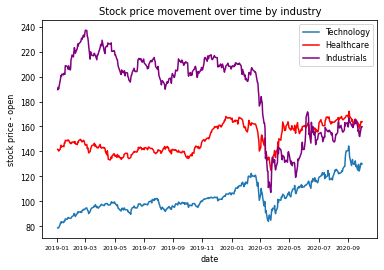

In [145]:
fig = plt.figure()

plt.plot("datetime", "open_x",label ="Technology", data = df_tech_groupby)
plt.plot("datetime", "open_x",label ="Healthcare", color="r",data = df_healthcare_groupby)
plt.plot("datetime", "open_x",label ="Industrials", color="purple", data = df_industrials_groupby)
plt.xlabel('date')
plt.ylabel('stock price - open')
plt.title('Stock price movement over time by industry')
plt.legend()
plt.show()

fig.savefig("stock_prices_industry.png")


In [20]:
covid_df = pd.read_csv("world_covid_data.csv",encoding="UTF8")
covid_df.head()

covid_df["datetime"] = covid_df["date"].apply(lambda s: datetime.datetime.strptime(s, "%d/%m/%Y"))

covid_usa = covid_df.loc[covid_df["iso_code"] == "USA"]
covid_usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 45092 to 45370
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   iso_code                         279 non-null    object        
 1   continent                        279 non-null    object        
 2   location                         279 non-null    object        
 3   date                             279 non-null    object        
 4   total_cases                      279 non-null    float64       
 5   new_cases                        279 non-null    float64       
 6   new_cases_smoothed               273 non-null    float64       
 7   total_deaths                     279 non-null    float64       
 8   new_deaths                       279 non-null    float64       
 9   new_deaths_smoothed              273 non-null    float64       
 10  total_cases_per_million          279 non-null    float64

In [24]:
plt.plot("datetime", "open_x",label ="Technology", data = df_tech_groupby)
plt.plot("datetime", "total_cases",label ="Total cases", data = covid_usa)
plt.xlabel('date')
plt.ylabel('stock price - open')
plt.title('Stock price movement over time')
plt.legend()
plt.show()

NameError: name 'df_tech_groupby' is not defined

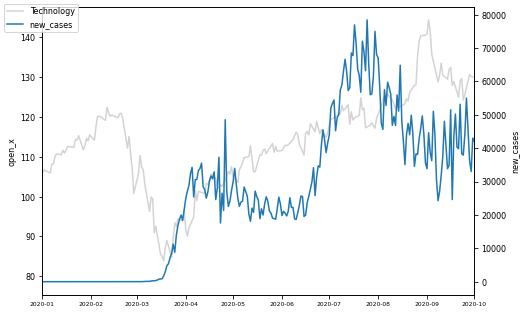

In [142]:
fig = plt.figure()
a1 = fig.add_axes([0,0,1,1])
x = covid_df["datetime"]
a1.plot("datetime", "open_x",color="lightgrey", data = df_tech_groupby)
a1.set_ylabel('open_x')
a2 = a1.twinx()
a2.plot("datetime", "new_cases", data = covid_usa)
a2.set_ylabel('new_cases')
fig.legend(labels = ('Technology','new_cases'),loc='upper left')
plt.xlim("2020-01", "2020-10")
plt.show()



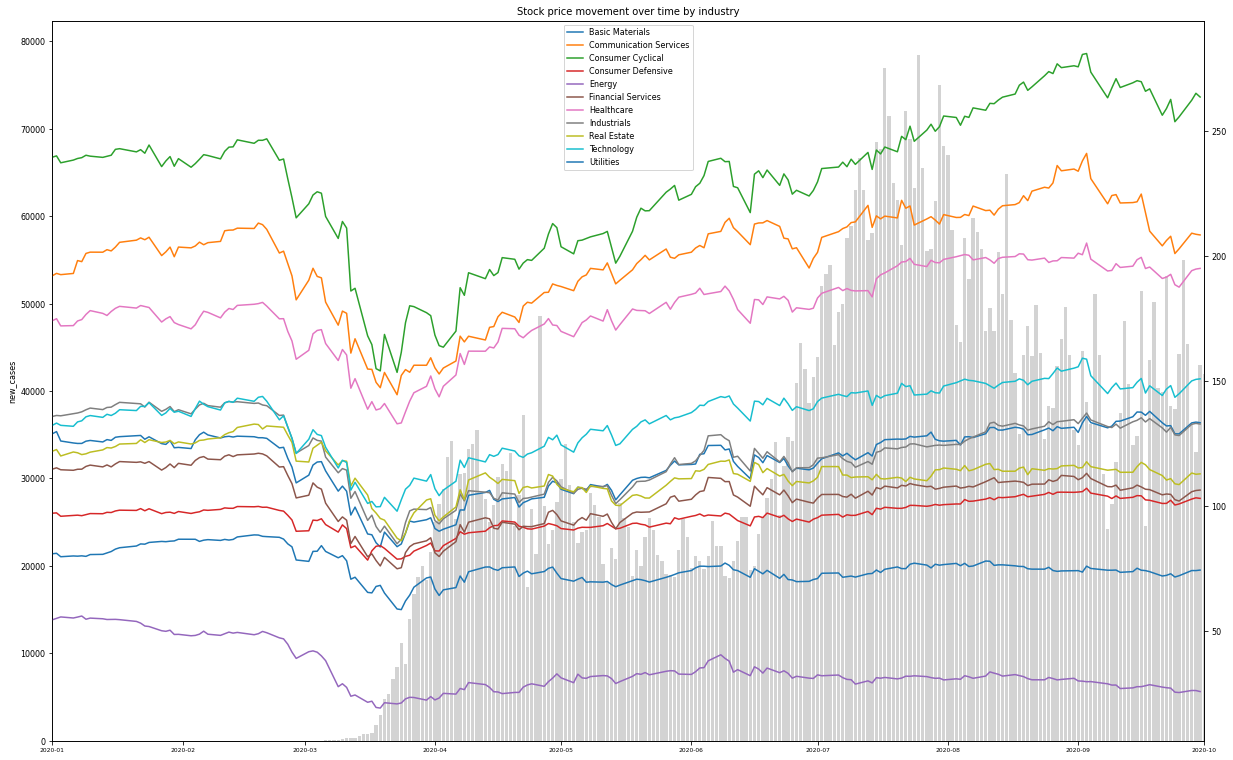

In [23]:
fig = plt.figure(figsize=(16,10))
a1 = fig.add_axes([0,0,1,1])
x = covid_usa["datetime"]
a1.bar("datetime", "new_cases",color="lightgrey", data = covid_usa)
a1.set_ylabel('new_cases')
a2 = a1.twinx()
for sector, df in df_group:
    df_group_date = df.groupby(by="datetime").mean("open_x").reset_index()
    a2.plot("datetime", "open_x", label=sector, data = df_group_date)
plt.title('Stock price movement over time by industry')
plt.legend()
plt.xlim("2020-01", "2020-10")
plt.show()



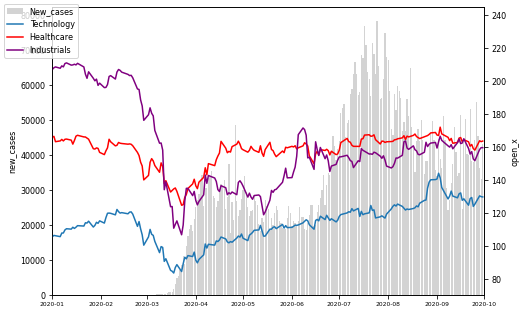

In [148]:



fig = plt.figure()
a1 = fig.add_axes([0,0,1,1])
x = covid_df["datetime"]

a1.bar("datetime", "new_cases",color="lightgrey", data = covid_usa)
#a1.plot("datetime", "open_x", data = df_tech_groupby)
a1.set_ylabel('new_cases')
a2 = a1.twinx()
a2.plot("datetime", "open_x", data = df_tech_groupby)
a2.set_ylabel('open_x')
#a3 = a2.twinx()
a2.plot("datetime", "open_x",color="r", data = df_healthcare_groupby)
#a4 = a3.twinx()
a2.plot("datetime", "open_x",color="purple", data = df_industrials_groupby)
fig.legend(labels = ('New_cases','Technology','Healthcare','Industrials'),loc='upper left')
plt.xlim("2020-01", "2020-10")
plt.show()

fig.savefig("covid_industries.png",papertype="letter",bbox_inches="tight")